In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:

df["loan_percent_income"].fillna(inplace=True, method="ffill")
df["cb_person_cred_hist_length"].fillna(inplace=True, method="ffill")
df["credit_score"].fillna(inplace=True, method="ffill")
df["previous_loan_defaults_on_file"].fillna(inplace=True, method="ffill")
df["loan_status"].fillna(inplace=True,method="ffill")

In [ ]:
fig = px.pie(df, names='person_gender')
fig.show()

<Axes: xlabel='person_gender', ylabel='Count'>

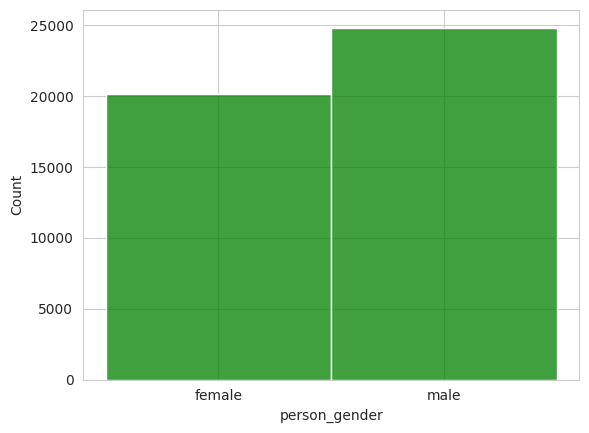

In [ ]:
sns.set_style('whitegrid')
sns.histplot(df['person_gender'],color ='green', bins = 10)

In [ ]:
df['person_gender'] = [ 1 if i=='male' else 0 for i in df['person_gender']]
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,1,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,1,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.loan_status.unique()

array([1, 0])

In [ ]:
df.loan_status.value_counts()

,count
loan_status,
0,35000
1,10000


In [ ]:

fig = px.pie(df, names='loan_status')
fig.show()

(array([35000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

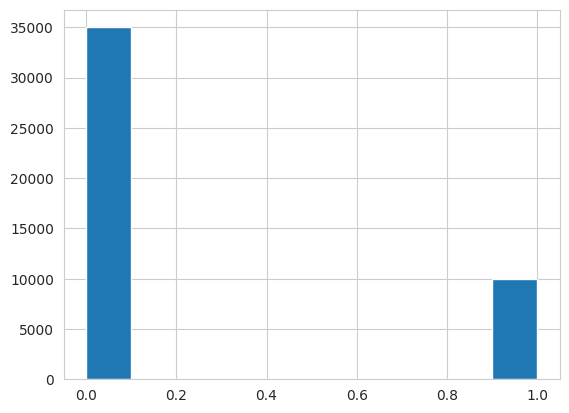

In [ ]:

plt.hist(df.loan_status)

In [ ]:
df["person_education"].value_counts()

,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


In [ ]:
df["person_education"].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

<Axes: xlabel='person_education', ylabel='Count'>

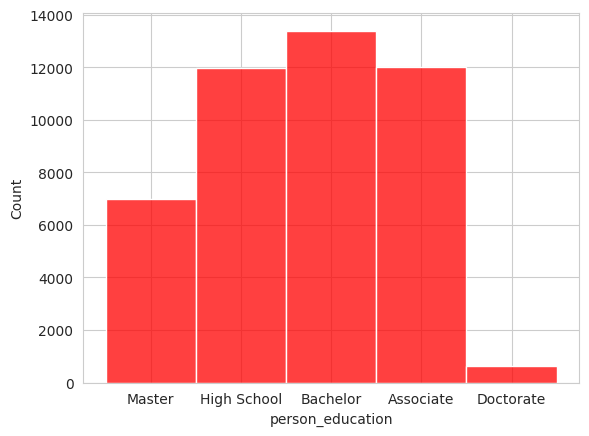

In [ ]:
sns.set_style('whitegrid')
sns.histplot(df['person_education'],color ='red', bins = 10)

In [ ]:
fig = px.pie(df, names='person_education')
fig.show()

In [ ]:
df['person_education'] = df['person_education'].replace('Master', 1, regex=True)
df['person_education'] = df['person_education'].replace('High School', 2, regex=True)
df['person_education'] = df['person_education'].replace('Bachelor', 3, regex=True)
df['person_education'] = df['person_education'].replace('Associate', 4, regex=True)
df['person_education'] = df['person_education'].replace('Doctorate', 5, regex=True)

In [ ]:
df.shape

(45000, 14)

In [ ]:
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df["person_home_ownership"].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


<Axes: xlabel='person_home_ownership', ylabel='Count'>

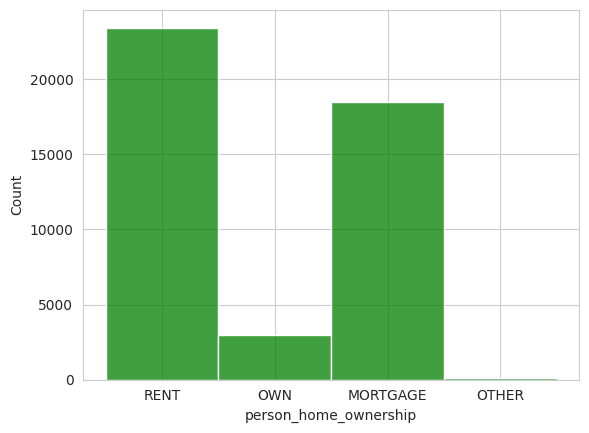

In [ ]:
sns.set_style('whitegrid')
sns.histplot(df['person_home_ownership'],color ='green', bins = 10)

In [ ]:

fig = px.pie(df, names='person_home_ownership')
fig.show()

In [ ]:
df['person_home_ownership'] = df['person_home_ownership'].replace('RENT', 1, regex=True)
df['person_home_ownership'] = df['person_home_ownership'].replace('MORTGAGE', 2, regex=True)
df['person_home_ownership'] = df['person_home_ownership'].replace('OWN', 3, regex=True)
df['person_home_ownership'] = df['person_home_ownership'].replace('OTHER', 4, regex=True)

In [ ]:
df.previous_loan_defaults_on_file.value_counts()

,count
previous_loan_defaults_on_file,
Yes,22858
No,22142


In [ ]:
df.previous_loan_defaults_on_file.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:

fig = px.pie(df, names='previous_loan_defaults_on_file')
fig.show()

<Axes: xlabel='previous_loan_defaults_on_file', ylabel='Count'>

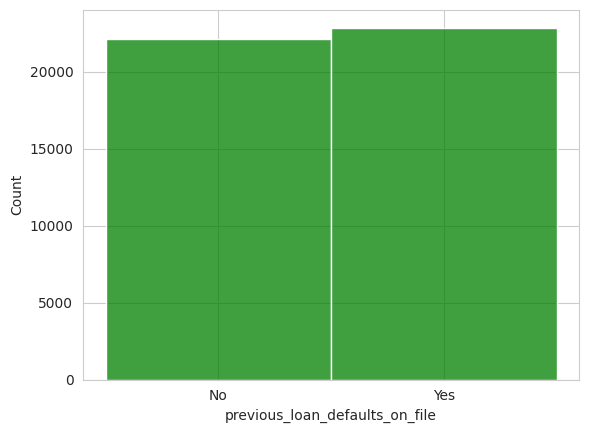

In [ ]:
sns.set_style('whitegrid')
sns.histplot(df['previous_loan_defaults_on_file'],color ='green', bins = 10)

In [ ]:
df['previous_loan_defaults_on_file'] = [ 1 if i=='Yes' else 0 for i in df['previous_loan_defaults_on_file']]
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,1,71948.0,0,1,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,0,2,12282.0,0,3,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,0,2,12438.0,3,2,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,0,3,79753.0,0,1,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,1,1,66135.0,1,1,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1


In [ ]:
df.loan_intent.unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
df.loan_intent.value_counts()

,count
loan_intent,
EDUCATION,9153
MEDICAL,8548
VENTURE,7819
PERSONAL,7552
DEBTCONSOLIDATION,7145
HOMEIMPROVEMENT,4783


In [ ]:
df['loan_intent'] = df['loan_intent'].replace('EDUCATION', 1, regex=True)
df['loan_intent'] = df['loan_intent'].replace('MEDICAL', 1, regex=True)
df['loan_intent'] = df['loan_intent'].replace('VENTURE', 1, regex=True)
df['loan_intent'] = df['loan_intent'].replace('PERSONAL', 1, regex=True)
df['loan_intent'] = df['loan_intent'].replace('DEBTCONSOLIDATION', 1, regex=True)
df['loan_intent'] = df['loan_intent'].replace('HOMEIMPROVEMENT', 1, regex=True)


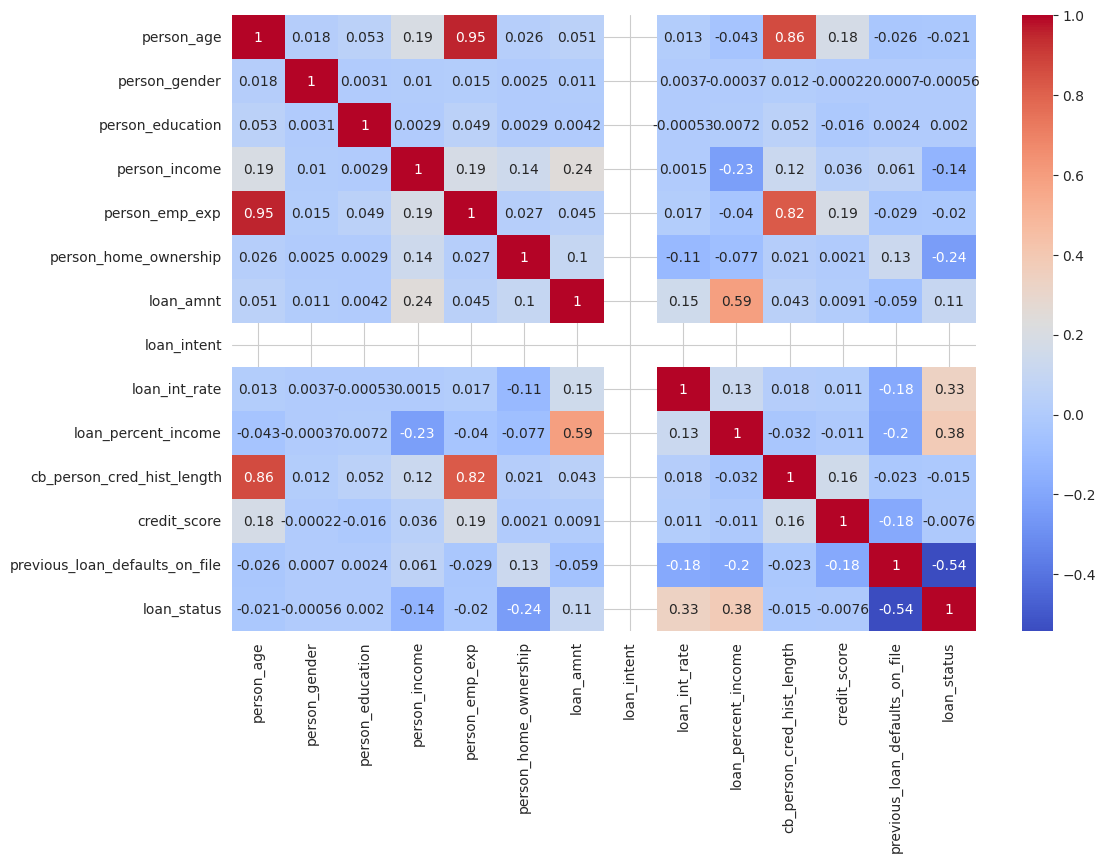

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
threshold = 0.003
correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["loan_status"]) > threshold].tolist()
high_corr_features.remove("loan_status")
print(high_corr_features)
X_selected = df[high_corr_features]
Y = df["loan_status"]

['person_age', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']


In [ ]:
X_selected

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,71948.0,0,1,35000.0,16.02,0.49,3.0,561,0
1,21.0,12282.0,0,3,1000.0,11.14,0.08,2.0,504,1
2,25.0,12438.0,3,2,5500.0,12.87,0.44,3.0,635,0
3,23.0,79753.0,0,1,35000.0,15.23,0.44,2.0,675,0
4,24.0,66135.0,1,1,35000.0,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,1,15000.0,15.66,0.31,3.0,645,0
44996,37.0,65800.0,17,1,9000.0,14.07,0.14,11.0,621,0
44997,33.0,56942.0,7,1,2771.0,10.02,0.05,10.0,668,0
44998,29.0,33164.0,4,1,12000.0,13.23,0.36,6.0,604,0


In [ ]:
Y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[ 1.03155995,  0.21071386,  0.92186018, ...,  0.80741924,
        -0.03189741, -1.01603973],
       [-0.45726369, -0.09159296, -0.3975175 , ..., -0.48135391,
         0.52326926,  0.98421348],
       [ 2.18953389,  3.01259775,  2.07631565, ...,  1.3229285 ,
         0.9991264 ,  0.98421348],
       ...,
       [ 0.8661351 , -0.27358386,  0.59201576, ...,  0.80741924,
         0.38447759,  0.98421348],
       [-0.29183884,  1.22209631,  0.09724913, ..., -0.73910854,
        -0.5672367 , -1.01603973],
       [-0.29183884,  1.6236302 , -0.23259529, ..., -0.73910854,
         0.62240616,  0.98421348]])

In [ ]:
X_test

array([[ 0.70071025,  0.20574007,  0.75693797, ...,  1.06517387,
        -0.62671884, -1.01603973],
       [-0.62268854, -0.29197444,  0.09724913, ..., -0.48135391,
         0.28534069,  0.98421348],
       [-0.95353824, -0.53494398, -0.89228413, ..., -0.48135391,
         1.55429307, -1.01603973],
       ...,
       [-0.62268854, -0.01702345, -0.72736192, ..., -0.73910854,
        -0.36896289, -1.01603973],
       [ 1.69325934, -0.53688375,  1.74647123, ...,  2.09619239,
         1.23705497, -1.01603973],
       [-0.45726369, -0.56083254, -0.89228413, ..., -0.73910854,
         0.04741211, -1.01603973]])

In [ ]:
Y_train

,loan_status
25180,0
12555,0
29153,0
23838,0
35686,0
...,...
11284,0
44732,1
38158,0
860,1


In [ ]:
Y_test

,loan_status
37979,0
9911,0
43386,1
13822,0
44810,1
...,...
14572,0
30384,0
36665,0
30569,0


In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
Y_pred = logreg.predict(X_test)

In [ ]:
accuracy=accuracy_score(Y_pred, Y_pred)
conf_matrix=confusion_matrix(Y_test, Y_pred)
class_report=classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 1.0000

Confusion Matrix:
[[6542  448]
 [ 544 1466]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



In [ ]:
print(accuracy_score(Y_test, Y_pred))

0.8897777777777778


In [ ]:
model2 = SVC()
model2.fit(X_train, Y_train)

SVC()

In [ ]:
Y_pred2 = model2.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))

0.9056666666666666


In [ ]:
modelc = SVC(C= 10)
modelc.fit(X_train, Y_train)

SVC(C=10)

In [ ]:
Y_predc = modelc.predict(X_test)
print(accuracy_score(Y_test, Y_predc))

0.9091111111111111


In [ ]:
modelg = SVC(gamma= 0.0122)
modelg.fit(X_train, Y_train)

SVC(gamma=0.0122)

In [ ]:
Y_predg = modelg.predict(X_test)
print(accuracy_score(Y_test, Y_predg))

0.8984444444444445


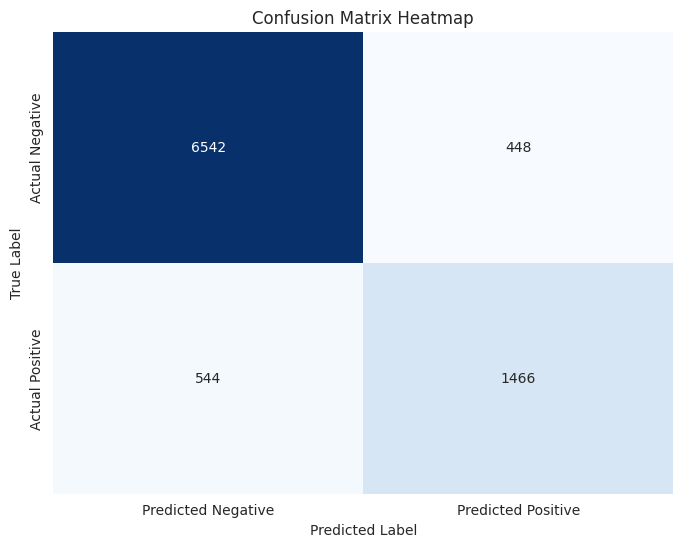

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.83%


In [ ]:
classification_report(Y_test, y_pred_knn)

'              precision    recall  f1-score   support\n\n           0       0.92      0.94      0.93      6990\n           1       0.77      0.71      0.74      2010\n\n    accuracy                           0.89      9000\n   macro avg       0.85      0.82      0.83      9000\nweighted avg       0.89      0.89      0.89      9000\n'